In [1]:
from fastapi import FastAPI, Request
import dependencies.orion_utils as orion
import dependencies.geojson_utils as geojs
import dependencies.ngsi_utils as ngsi
import paho.mqtt.client as Paho

import modules.iot_platform.cosmicswamp as cosmic
import modules.simulation_platform.pcse_simulator as pcsesm
import modules.information_platform as infplm
import modules.iot_platform as iotplm
import sys
import datetime
import time

import numpy as np

In [5]:
sr = orion.session(service="openiot", servicepath="/cosmos2024") #Build session request
cosmic.register_session(sr)

In [8]:
field_center = [-45.523917847717236,-12.170341419421398]
infplm.field.create(sr, "Field:1", center_location=field_center, radius=600)
infplm.field.create(sr, "Field:2", center_location=field_center, radius=600)
infplm.field.create(sr, "Field:2", center_location=field_center, radius=600)

infplm.field.split_into_radial_zones(sr, "Field:1")
print("DONE")
# e = cosmicswamp.get_current_entity_from_id(s, "Field:1")

DONE


In [9]:
cosmic.get_all_current_entity_ids(sr)

[DEBUG:cosmicswamp:24-09-22T21:35:50.2]: http://backend-orion:1026/v2/entities?attrs=id,type&limit=100 {'Fiware-Servicepath': '/cosmos2024', 'Fiware-Service': 'openiot'}


[{'id': 'urn:ngsi-ld:Field:1', 'type': 'Field'},
 {'id': 'urn:ngsi-ld:Field:2', 'type': 'Field'},
 {'id': 'urn:ngsi-ld:Field:3', 'type': 'Field'},
 {'id': 'urn:ngsi-ld:Field:02', 'type': 'Thing'},
 {'id': 'urn:ngsi-ld:Field:ABC', 'type': 'Thing'},
 {'id': 'urn:ngsi-ld:SoilProbe:1', 'type': 'SoilDepthProbe'},
 {'id': 'urn:ngsi-ld:Field:1:ManagementZone:0-0', 'type': 'ManagementZone'},
 {'id': 'urn:ngsi-ld:Field:1:ManagementZone:0-1', 'type': 'ManagementZone'},
 {'id': 'urn:ngsi-ld:Field:1:ManagementZone:0-2', 'type': 'ManagementZone'},
 {'id': 'urn:ngsi-ld:Field:1:ManagementZone:1-0', 'type': 'ManagementZone'},
 {'id': 'urn:ngsi-ld:Field:1:ManagementZone:1-1', 'type': 'ManagementZone'},
 {'id': 'urn:ngsi-ld:Field:1:ManagementZone:1-2', 'type': 'ManagementZone'},
 {'id': 'urn:ngsi-ld:Field:1:ManagementZone:2-0', 'type': 'ManagementZone'},
 {'id': 'urn:ngsi-ld:Field:1:ManagementZone:2-1', 'type': 'ManagementZone'},
 {'id': 'urn:ngsi-ld:Field:1:ManagementZone:2-2', 'type': 'ManagementZone'

In [5]:
e = cosmic.get_current_entity_from_id(sr, "Field:1")

In [6]:
import dependencies.leaflet_utils as leaf
import ipyleaflet

m = leaf.build_map([-45.523917847717236,-12.170341419421398])

def reverse_latlon_pairs(latlon_pairs):
    """
    Reverses a list of (latitude, longitude) pairs to (longitude, latitude) pairs.
    
    Parameters:
    latlon_pairs (list of tuples): List of (latitude, longitude) pairs.
    
    Returns:
    list of tuples: List of (longitude, latitude) pairs.
    """
    return [(lon, lat) for lat, lon in latlon_pairs]
    
polygon = ipyleaflet.Polygon(
    locations=reverse_latlon_pairs(e["location"]['value']['coordinates'][0]),
    color="green",
    fill_color="green"
)

m.add(polygon)
leaf.display_map(m)


Map(center=[-12.170341419421398, -45.523917847717236], controls=(ZoomControl(options=['position', 'zoom_in_tex…

In [7]:
# cosmic.create_entity(sr, entity_id="Field:ABC", entity_type="Field")

In [8]:
infplm.soildepthprobe.create(sr,
                             "SoilProbe:1",
                             location=geojs.point([-45.523917847717236,-12.170341419421398]))

{'id': 'SoilProbe:1',
 'type': 'SoilDepthProbe',
 'TimeInstant': {'value': '2024-09-22T21:13:40.471883', 'type': 'DateTime'},
 'state': {'type': 'Text', 'value': 'CREATION', 'metadata': {}},
 'source': {'type': 'Text', 'value': 'API', 'metadata': {}},
 'location': {'type': 'geo:json',
  'value': {'type': 'Point', 'coordinates': [-45.523918, -12.170341]}},
 'UploadInstant': {'type': 'DateTime', 'value': '2024-09-22T21:13:40.478271'},
 'messageindex': {'type': 'Number', 'value': 0, 'metadata': {}},
 'soiltemperature0': {'type': 'Number',
  'value': 0.0,
  'metadata': {'units': {'type': 'String', 'value': 'C'}}},
 'soiltemperature1': {'type': 'Number',
  'value': 0.0,
  'metadata': {'units': {'type': 'String', 'value': 'C'}}},
 'soiltemperature2': {'type': 'Number',
  'value': 0.0,
  'metadata': {'units': {'type': 'String', 'value': 'C'}}},
 'soilcapacitance0': {'type': 'Number',
  'value': 0.0,
  'metadata': {'units': {'type': 'String', 'value': 'ADC'}}},
 'soilcapacitance1': {'type': 'N

In [9]:
infplm.soildepthprobe.update(sr, "SoilProbe:1", soiltemperature0=24, soiltemperature1=12)
infplm.soildepthprobe.update(sr, "SoilProbe:1", soiltemperature0=22, soiltemperature1=12)
infplm.soildepthprobe.update(sr, "SoilProbe:1", soiltemperature0=23, soiltemperature1=12)
infplm.soildepthprobe.update(sr, "SoilProbe:1", soiltemperature0=22, soiltemperature1=12)
infplm.soildepthprobe.update(sr, "SoilProbe:1", soiltemperature0=23, soiltemperature1=12)
infplm.soildepthprobe.update(sr, "SoilProbe:1", soiltemperature0=22, soiltemperature1=12)

In [6]:
e = cosmic.get_current_entity_from_id(sr, "SoilProbe:1")

df = cosmic.get_series_data_for_entity(sr, 
                                   entity_id="SoilProbe:1", 
                                   attrs=["time_index", "soiltemperature0"], 
                                   cuts=["soiltemperature0>23"] )



[DEBUG:cosmicswamp:24-09-22T21:30:06.5]: SELECTION SELECT time_index, soiltemperature0  FROM "mtopeniot"."etsoildepthprobe" WHERE fiware_servicepath='/cosmos2024'  AND entity_id='urn:ngsi-ld:SoilProbe:1'   AND soiltemperature0>23   ORDER BY time_index ASC LIMIT 1000
RETRIEVING SELECT time_index, soiltemperature0  FROM "mtopeniot"."etsoildepthprobe" WHERE fiware_servicepath='/cosmos2024'  AND entity_id='urn:ngsi-ld:SoilProbe:1'   AND soiltemperature0>23   ORDER BY time_index ASC LIMIT 1000 crate://backend-cratedb:4200


In [12]:
# from prettyprinter import cpprint
# cpprint(e)

In [32]:
import pandas as pd
df = pd.DataFrame(data=df)
df["time_index"] = pd.to_datetime(df["time_index"], unit='ms')

In [33]:
print(df)

               time_index  soiltemperature0
0 2024-09-22 15:26:11.576              24.0
1 2024-09-22 15:30:01.320              24.0
2 2024-09-22 15:38:06.412              24.0
3 2024-09-22 21:12:05.031              24.0
4 2024-09-22 21:13:40.668              24.0


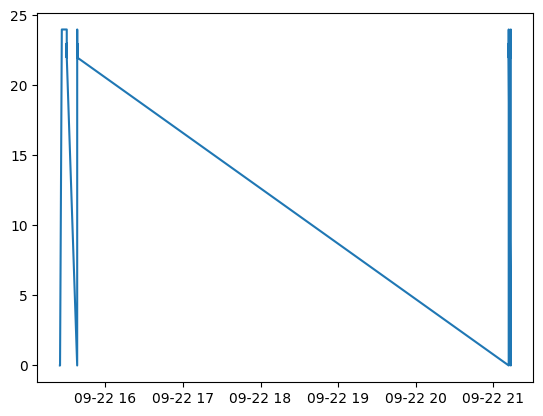

In [30]:
import matplotlib.pyplot as plt

plt.plot(df.time_index, df.soiltemperature0)

In [36]:
from pypika import Query, Table, Field


In [35]:
!pip install pypika

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.3/67.3 KB 2.7 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for pypika: filename=PyPika-0.48.9-py2.py3-none-any.whl size=53738 sha256=a05484427b470bef719a41afcb7ab2a76feb7b64572caa753eddac282079d969
  Stored in directory: /root/.cache/pip/wheels/e1/26/51/d0bffb3d2fd82256676d7ad3003faea3bd6dddc9577af665f4
Successfully built pypika


In [2]:
from pypika import Query, Table, Field, Order


In [3]:
ent=Table('customers')

Query.from_('customers')\
    .select(ent.id, ent.lname, ent.phone)\
    .where(ent.entity_id == 'testdev')\
    .orderby('time_index', order=Order.desc)

SELECT "id","lname","phone" FROM "customers" WHERE "entity_id"='testdev' ORDER BY "time_index" DESC

In [32]:
import math

def generate_grid(lat, lon, range_m=400, step_m=5):
    # Earth's radius in meters
    R = 6378137
    
    # Convert latitude and longitude from degrees to radians
    lat_rad = math.radians(lat)
    lon_rad = math.radians(lon)
    
    # Calculate the length of a degree in meters
    lat_deg_to_m = R * math.pi / 180
    lon_deg_to_m = R * math.cos(lat_rad) * math.pi / 180
    
    # Initialize the grid
    grid = []

    # Generate grid points
    for dx in range(-range_m, range_m + step_m, step_m):
        for dy in range(-range_m, range_m + step_m, step_m):
            new_lat = lat + (dy / lat_deg_to_m)
            new_lon = lon + (dx / lon_deg_to_m)
            grid.append((new_lat, new_lon))
    
    return grid

# Example usage
# [-45.523917847717236,-12.170341419421398]
lat = -45.523917847717236  # Latitude for London
lon = -12.170341419421398  # Longitude for London

grid_points = generate_grid(lat, lon)

# Print some of the grid points
for point in grid_points[:10]:  # Printing only the first 10 points for brevity
    print(point)


(-45.527511108853716, -12.175470169577881)
(-45.52746619308951, -12.175470169577881)
(-45.5274212773253, -12.175470169577881)
(-45.527376361561096, -12.175470169577881)
(-45.52733144579689, -12.175470169577881)
(-45.52728653003268, -12.175470169577881)
(-45.527241614268476, -12.175470169577881)
(-45.52719669850427, -12.175470169577881)
(-45.52715178274006, -12.175470169577881)
(-45.52710686697586, -12.175470169577881)


In [33]:
cosmic.get_current_entity_from_id(sr, "Field:1:ManagementZone:0-0")

{'id': 'urn:ngsi-ld:Field:1:ManagementZone:0-0',
 'type': 'ManagementZone',
 'TimeInstant': {'type': 'DateTime',
  'value': '2024-09-22T21:35:40.00Z',
  'metadata': {}},
 'location': {'type': 'geo:json',
  'value': {'type': 'Polygon',
   'coordinates': [[[-45.523918, -12.170341],
     [-45.523918, -12.168542],
     [-45.525512, -12.169442],
     [-45.523918, -12.170341],
     [-45.523918, -12.170341]]]},
  'metadata': {}},
 'zoneid': {'type': 'Text', 'value': '0-0', 'metadata': {}}}

In [26]:
import shapely

In [14]:
!pip install shapely

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.5/2.5 MB 4.5 MB/s eta 0:00:0000:0100:01


In [34]:
from shapely.geometry import shape, Point

def is_point_in_geojson(geojson_obj, points):
    # Convert the GeoJSON object to a shapely geometry
    geometry = shape(geojson_obj)
    print(len(points))
    # Check each point
    results = []
    for point in points:
        point_geom = Point(point)
        is_inside = geometry.contains(point_geom)
        results.append(is_inside)

    return results


for obj in cosmic.get_all_current_entities_of_type(sr, "ManagementZone"):
    print(obj["id"])

    loc = geojson.GeoJSON(obj["location"]["value"])
    print(loc)

    results = is_point_in_geojson(loc, grid_points)
    print(np.any(results))

    
    

urn:ngsi-ld:Field:1:ManagementZone:0-0
{"coordinates": [[[-45.523918, -12.170341], [-45.523918, -12.168542], [-45.525512, -12.169442], [-45.523918, -12.170341], [-45.523918, -12.170341]]], "type": "Polygon"}
25921
True
urn:ngsi-ld:Field:1:ManagementZone:0-1
{"coordinates": [[[-45.523918, -12.168542], [-45.523918, -12.166744], [-45.527105, -12.168542], [-45.525512, -12.169442], [-45.523918, -12.168542]]], "type": "Polygon"}
25921
True
urn:ngsi-ld:Field:1:ManagementZone:0-2
{"coordinates": [[[-45.523918, -12.166744], [-45.523918, -12.164945], [-45.528698, -12.167643], [-45.527105, -12.168542], [-45.523918, -12.166744]]], "type": "Polygon"}
25921
True
urn:ngsi-ld:Field:1:ManagementZone:1-0
{"coordinates": [[[-45.523918, -12.170341], [-45.525512, -12.169442], [-45.525512, -12.17124], [-45.523918, -12.170341], [-45.523918, -12.170341]]], "type": "Polygon"}
25921
True
urn:ngsi-ld:Field:1:ManagementZone:1-1
{"coordinates": [[[-45.525512, -12.169442], [-45.527105, -12.168542], [-45.527105, -12